# KDD CUP

Banco de dados utilizado no 3º KDD Cup.

## Descrição dos dados
Esse conjunto de dados é um conjunto de informações referente à simulações de _hacking_ em uma rede militar.

## Objetivo do exercício
Treinar um modelo classificador capaz de predizer se uma conexão é um ataque _hacker_ ou se é uma conexão normal.

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Leitura e análise dos dados

**Adição do cabeçalho dos dados e sua leitura:**

In [2]:
columns = ["duration", "protocoltype", "service", "flag", "srcbytes", "dstbytes", "land", "wrongfragment",
           "urgent", "hot", "numfailedlogins", "loggedin", "numcompromised", "rootshell", "suattempted",
           "numroot", "numfilecreations", "numshells", "numaccessfiles", "numoutboundcmds", "ishostlogin",
           "isguestlogin", "count", "srvcount", "serrorrate", "srvserrorrate", "rerrorrate", "srvrerrorrate",
           "samesrvrate", "diffsrvrate", "srvdiffhostrate", "dsthostcount", "dsthostsrvcount",
           "dsthostsamesrvrate", "dsthostdiffsrvrate", "dsthostsamesrcportrate", "dsthostsrvdiffhostrate",
           "dsthostserrorrate", "dsthostsrvserrorrate", "dsthostrerrorrate", "dsthostsrvrerror_rate", "labels"]
dataset = pd.read_csv('kddcup.data_10_percent', names=columns)

dataset.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate,labels
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


**Quantidade de dados encontrados:**

In [3]:
print(dataset.shape)

(494021, 42)


**Quantidade de informações nulas para cada coluna da tabela:**

In [4]:
dataset.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

**Gráfico da distribuição dos ataques:**

Text(0.5, 0, 'Tipo de acesso')

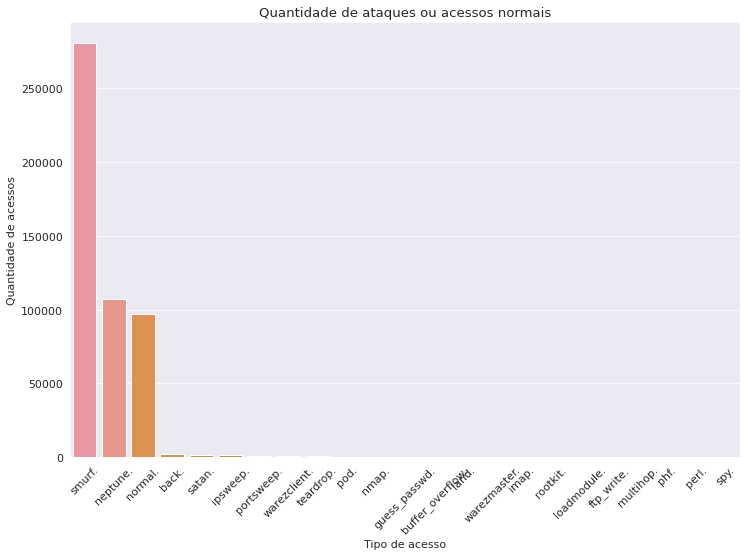

In [5]:

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,8)
font = {'size': 11}
plt.rc('font', **font)

grouped_labels = dataset.groupby('labels')['labels'].count().sort_values(ascending=False)
plt.xticks(rotation=45)
sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title('Quantidade de ataques ou acessos normais')
plt.ylabel('Quantidade de acessos')
plt.xlabel('Tipo de acesso')

## Pré-processamento

**Rotulando os valores categóricos:**

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['protocoltype'] = label_encoder.fit_transform(dataset['protocoltype'])
dataset['service'] = label_encoder.fit_transform(dataset['service'])
dataset['flag'] = label_encoder.fit_transform(dataset['flag'])

**Apresentação dos dados:**

In [7]:

dataset.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate,labels
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


**Rotulação da coluna _labels_:**

Nessa etapa considerarei qualquer acesso que não seja normal como ataque, independente do tipo de ataque.
Sendo assim:
* ataque = 0
* normal = 1

In [8]:
def normalize_labels(label):
    label = label.replace('.','')
    return label if label == 'normal' else 'attack'

dataset['labels'] = dataset['labels'].apply(lambda label: normalize_labels(label))
dataset['labels'] = label_encoder.fit_transform(dataset['labels'])

**Apresentação dos dados:**

In [9]:
dataset.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate,labels
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


**Distribuição dos ataques depois da rotulação da coluna _labels_:**

/home/dethrak/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='count'>

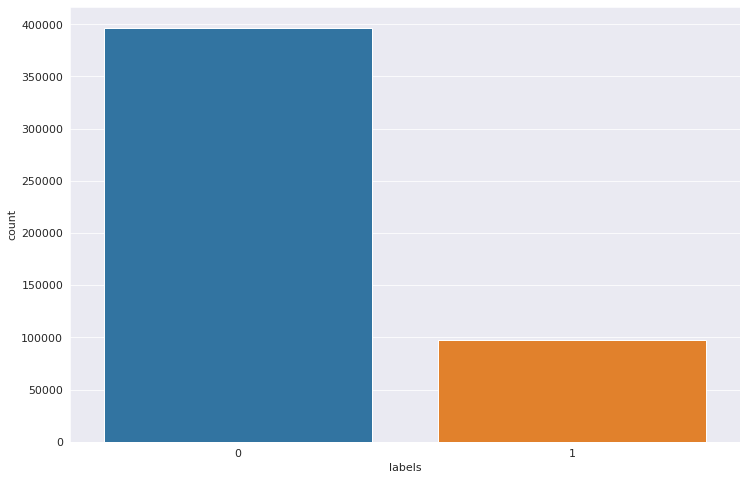

In [10]:
sns.countplot(dataset['labels'])

**Informação do conjunto de dados:**

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                494021 non-null  int64  
 1   protocoltype            494021 non-null  int64  
 2   service                 494021 non-null  int64  
 3   flag                    494021 non-null  int64  
 4   srcbytes                494021 non-null  int64  
 5   dstbytes                494021 non-null  int64  
 6   land                    494021 non-null  int64  
 7   wrongfragment           494021 non-null  int64  
 8   urgent                  494021 non-null  int64  
 9   hot                     494021 non-null  int64  
 10  numfailedlogins         494021 non-null  int64  
 11  loggedin                494021 non-null  int64  
 12  numcompromised          494021 non-null  int64  
 13  rootshell               494021 non-null  int64  
 14  suattempted         

**Identificação das colunas que não possuem variação:**

In [12]:
t=[]
for i in dataset.columns:
    t.append(dataset[i].nunique())

In [13]:
temp = []
for i in range(len(t)):
    if t[i]==1:
        temp.append(i)
        print(i)

19
20


**Remoção das colunas que não possuem variação:**

In [14]:
dataset.drop([dataset.columns[19], dataset.columns[20]], axis=1, inplace=True)

**Matriz de correlação dos dados:**

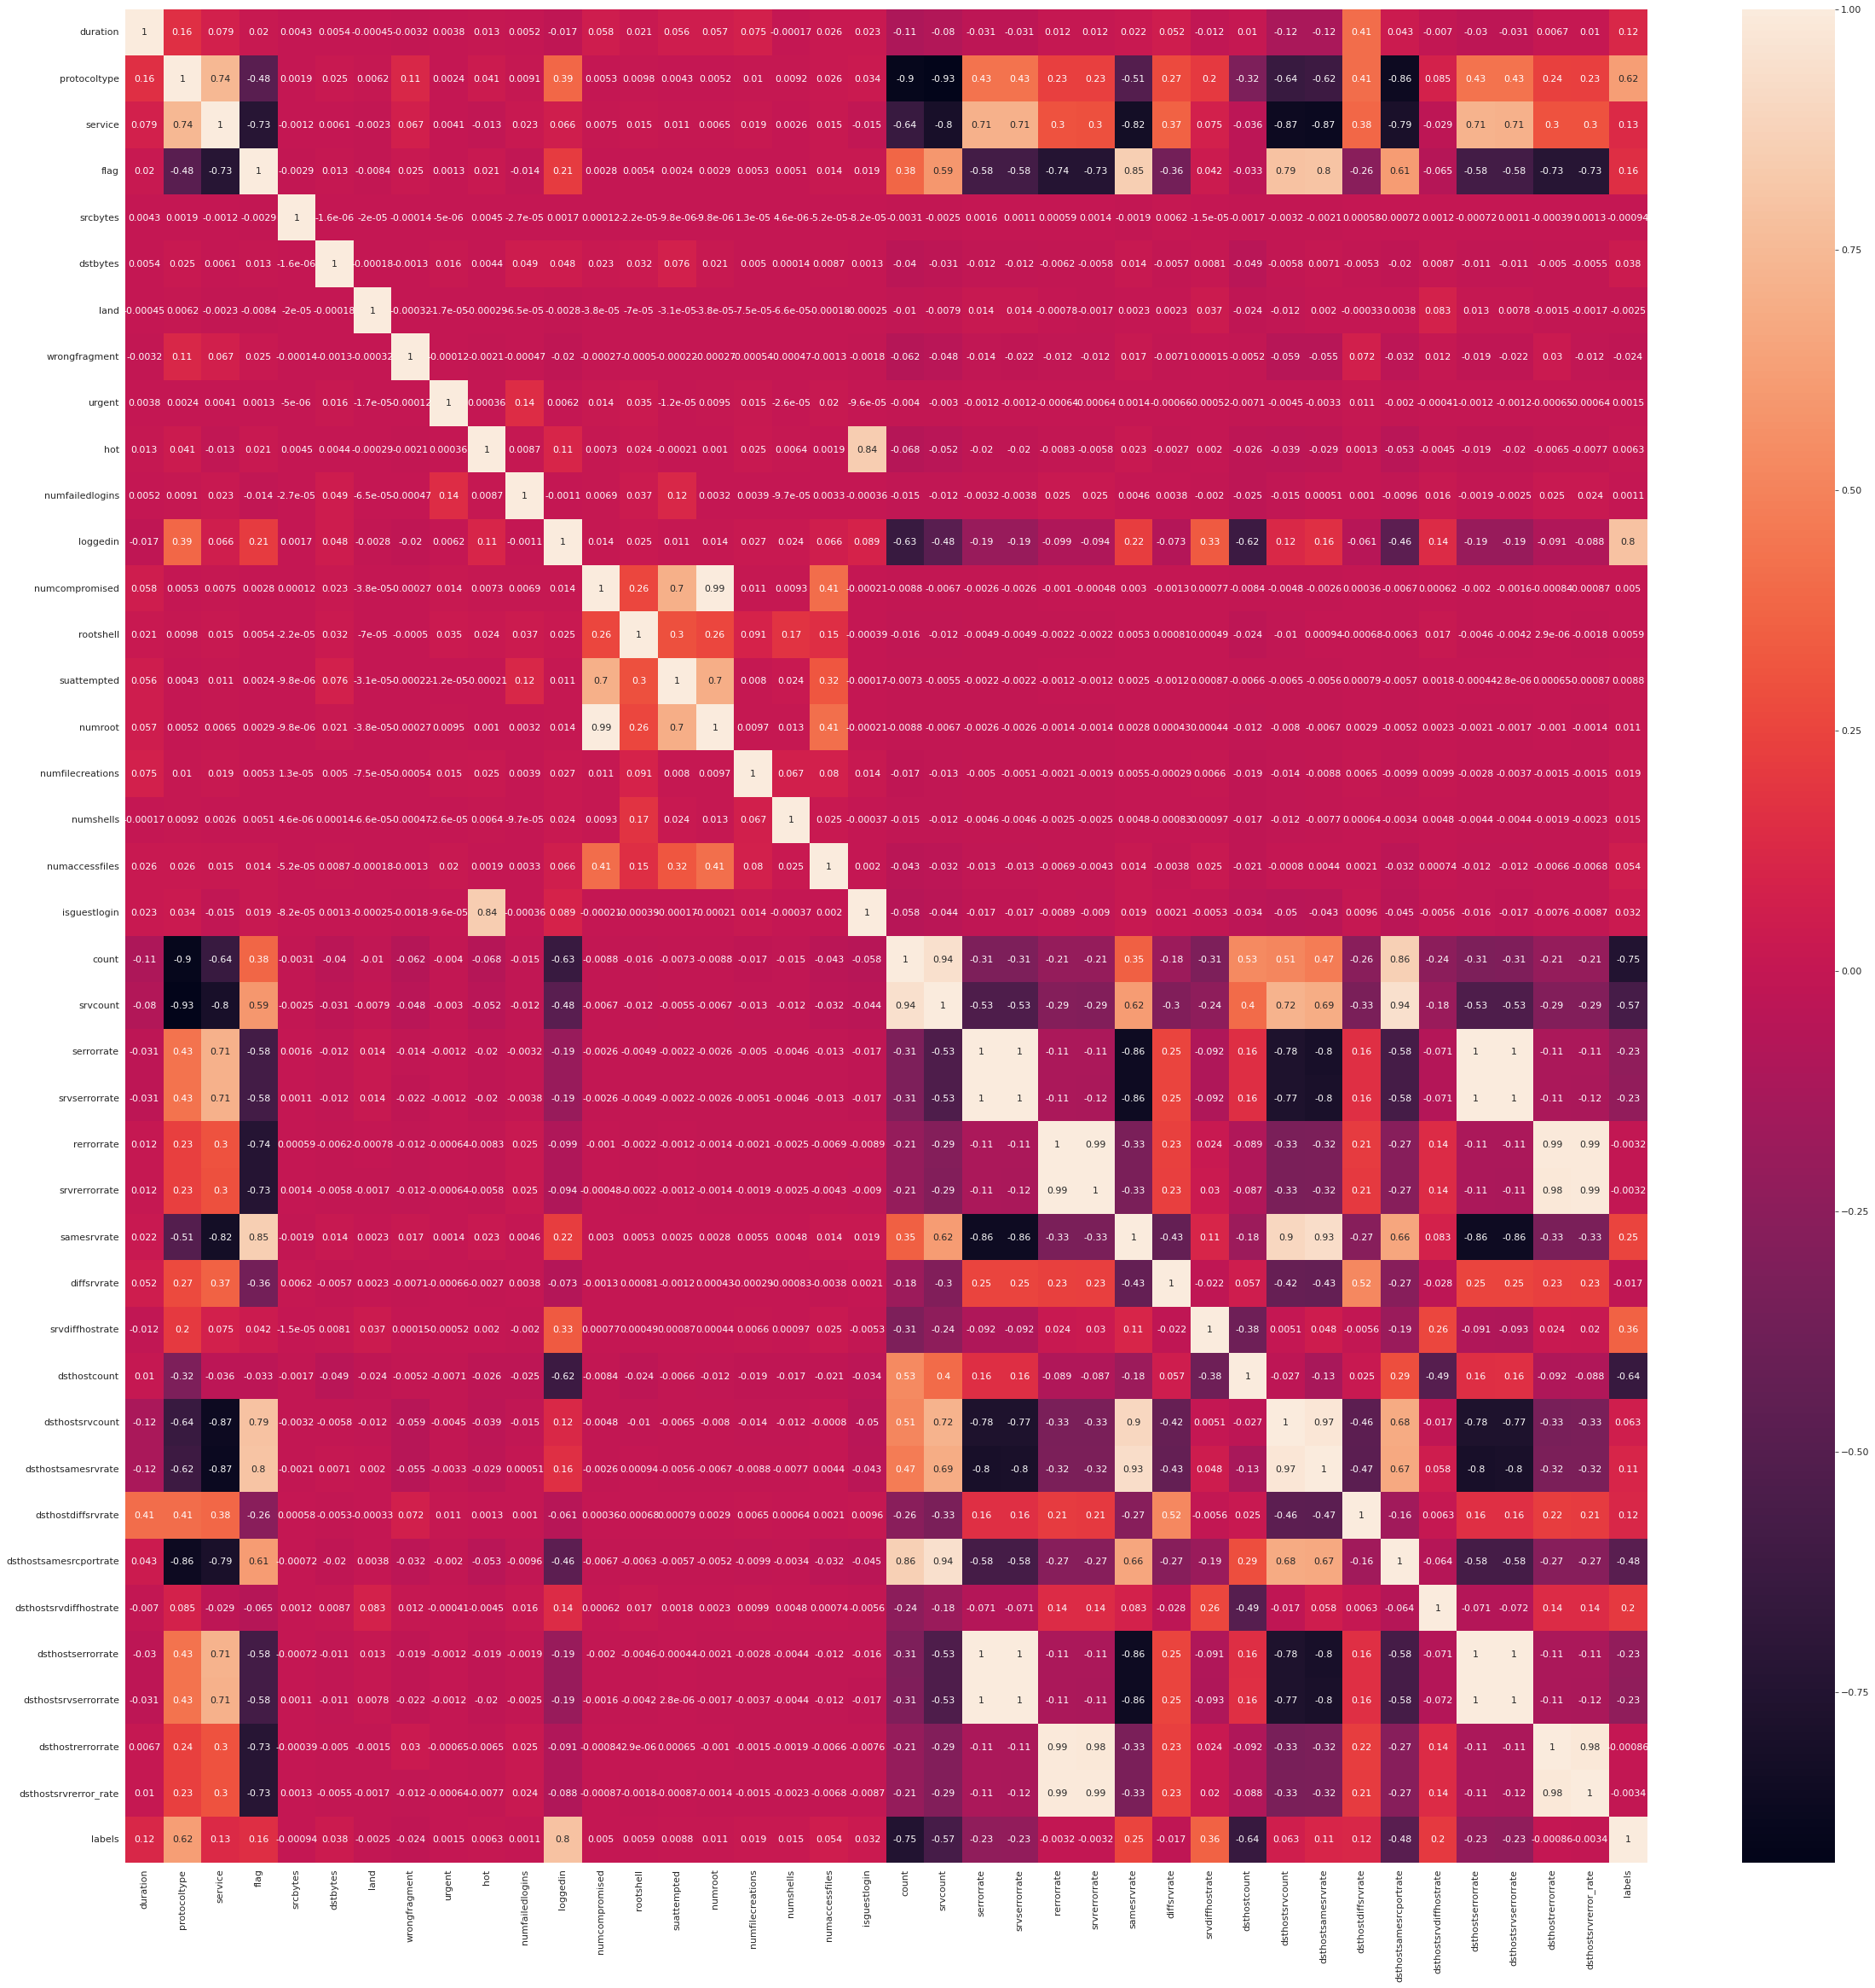

In [15]:
correlation = dataset.corr()
plt.figure(figsize=(40,40))
sns.heatmap(correlation, annot=True)
plt.show()

**Distribuição dos acessos diante ao tipo de protocolo:**
Sabendo-se que o tipo de protocolo segue o seguinte mapeamento:
* icmp = 0
* tcp = 1
* udp = 2

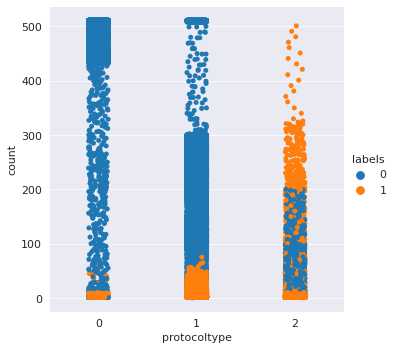

In [16]:
sns.catplot(x='protocoltype', y='count', hue='labels', data=dataset)

## Balanceamento dos dados

Como mostrado anteriormente, a coluna "labels" possui um desbalanceamento. Sendo assim, se torna interessante balanceá-la para podermos obter uma melhor análise sobre o modelo.
Para isso utilizarei o método NearMiss, que reduzirá a classe majoritária para o balanceamento.

**Para utilizar o NearMiss estaremos fazendo a inclusão da biblioteca imblearn:**

In [17]:
from imblearn.under_sampling import NearMiss

### Divisão dos dados

In [18]:
x = dataset.drop('labels', axis = 1)
x = x.loc[:, ['loggedin','protocoltype','duration','service','samesrvrate','srvdiffhostrate','dsthostsrvdiffhostrate']]
x.head(10)

,loggedin,protocoltype,duration,service,samesrvrate,srvdiffhostrate,dsthostsrvdiffhostrate
0,1,1,0,22,1.0,0.0,0.00
1,1,1,0,22,1.0,0.0,0.00
2,1,1,0,22,1.0,0.0,0.00
3,1,1,0,22,1.0,0.0,0.00
4,1,1,0,22,1.0,0.0,0.00
5,1,1,0,22,1.0,0.0,0.00
6,1,1,0,22,1.0,1.0,0.04
7,1,1,0,22,1.0,0.0,0.04
8,1,1,0,22,1.0,0.0,0.04
9,1,1,0,22,1.0,0.0,0.05


In [19]:
y = dataset['labels']

### Aplicação do Near Miss

In [20]:
near_miss = NearMiss()

In [21]:
x, y = near_miss.fit_resample(x, y)

<AxesSubplot:xlabel='labels', ylabel='count'>

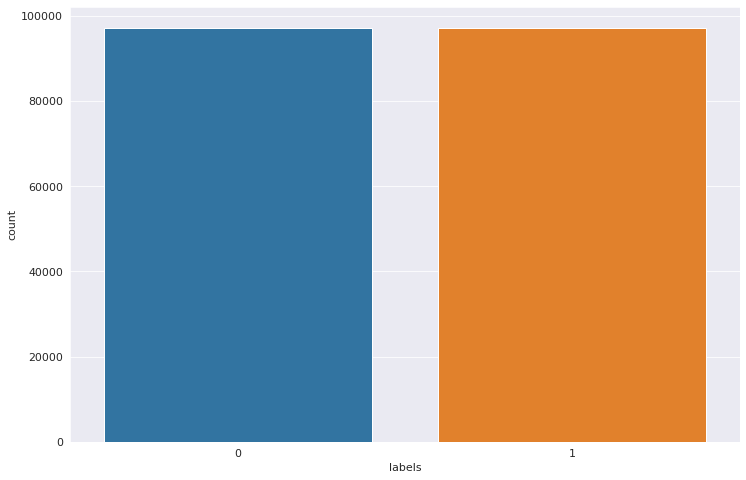

In [22]:
sns.countplot(x=y)

### Definição dos dados de treinamento e teste

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Modelos Classificadores

### Decision Tree

In [24]:
from sklearn import tree

**Instância:**

In [25]:
decision_tree = tree.DecisionTreeClassifier()


**Treinamento:**

In [26]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

**Predição:**

In [27]:
decision_tree_prediction = decision_tree.predict(x_test)


### Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

**Instância:**

In [29]:
gaussian_naive_bayes = GaussianNB()

**Treinamento:**

In [30]:
gaussian_naive_bayes.fit(x_train, y_train)

GaussianNB()

**Predição:**

In [31]:
gaussian_naive_bayes_prediction = gaussian_naive_bayes.predict(x_test)

### Matrizes de confusão

**Decision Tree**

In [32]:
print (pd.crosstab(y_test, decision_tree_prediction, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0        18935    530  19465
1           85  19362  19447
All      19020  19892  38912


**Gaussian Naive Bayes:**

In [33]:
print (pd.crosstab(y_test, gaussian_naive_bayes_prediction, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0        18857    608  19465
1          501  18946  19447
All      19358  19554  38912


### Parâmetros de resultado de classificação

**Decision Tree**

In [34]:
print(classification_report(y_test, decision_tree_prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     19465
           1       0.97      1.00      0.98     19447

    accuracy                           0.98     38912
   macro avg       0.98      0.98      0.98     38912
weighted avg       0.98      0.98      0.98     38912



**Gaussian Naive Bayes**

In [35]:
print(classification_report(y_test, gaussian_naive_bayes_prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19465
           1       0.97      0.97      0.97     19447

    accuracy                           0.97     38912
   macro avg       0.97      0.97      0.97     38912
weighted avg       0.97      0.97      0.97     38912

